In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*parameter 'algorithm' is deprecated.*")


In [64]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\data science\customer churn analysis\CustomerChurn.csv")

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
df.shape

(7043, 21)

In [67]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [68]:
#senior citizen should be categorical
#75%of people have tenure less than 55 months
#average monthly charges are 64.76 usd and 25% pay more than 89.85 usd

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
#customer churn analysis
#certain amount of people churn 
#some are active

#insights:talks more about churn
#total charges= should be int  

In [75]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [76]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0, 0.5, 'count')

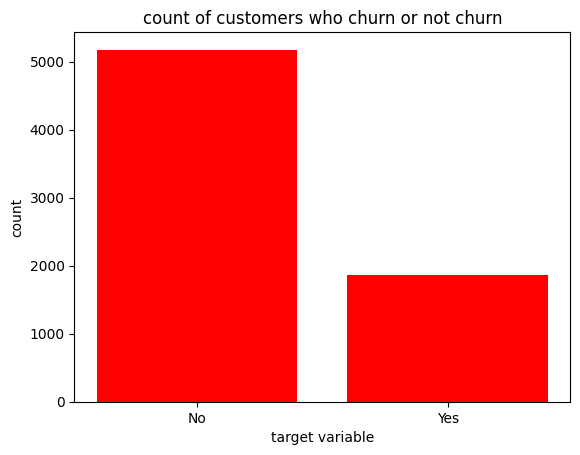

In [77]:
x=df['Churn'].value_counts()
plt.bar(x.index,x.values,color='red')
plt.title("count of customers who churn or not churn")
plt.xlabel("target variable")
plt.ylabel("count")

In [78]:
new_df=df.copy()

In [79]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
new_df['TotalCharges']=pd.to_numeric(new_df['TotalCharges'],errors='coerce')

In [81]:
new_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [82]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [83]:
#11 missing values
#only 0.15 percentage missing values
new_df.dropna(how='any',inplace=True)

In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [85]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')

In [86]:
new_df = new_df.drop(columns=['customerID'])

In [87]:
cat_cols = new_df.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)

Categorical columns:
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [88]:
num_cols = new_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:\n", num_cols)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


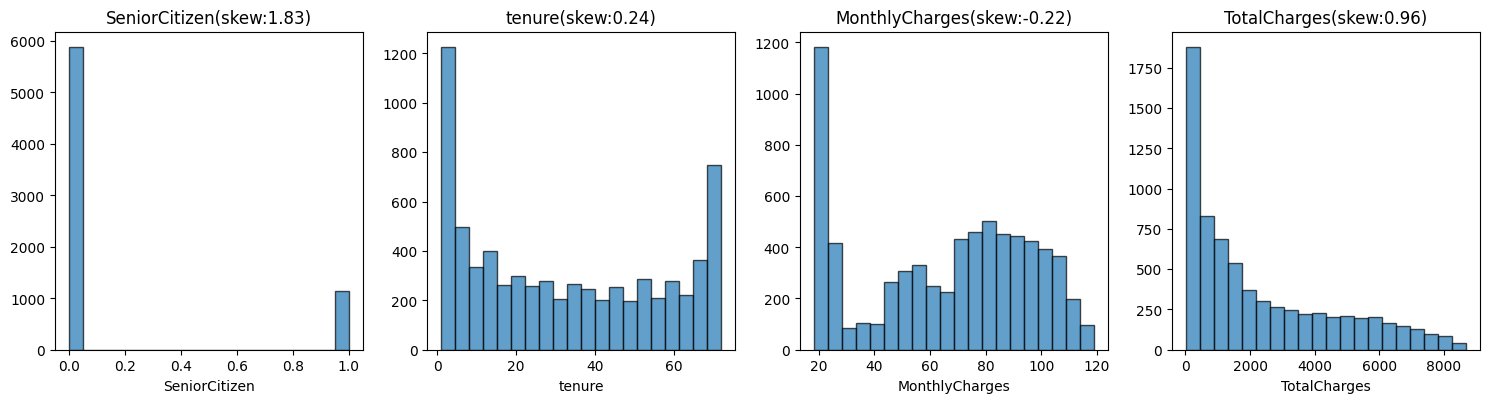

In [89]:

plt.figure(figsize=(15,15))
for i , col in enumerate(num_cols):
    plt.subplot(4 ,4 ,i+1)
    plt.hist(new_df[col],bins=20,alpha=0.7,edgecolor='black')
    plt.title(f"{col}(skew:{new_df[col].skew():.2f})")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

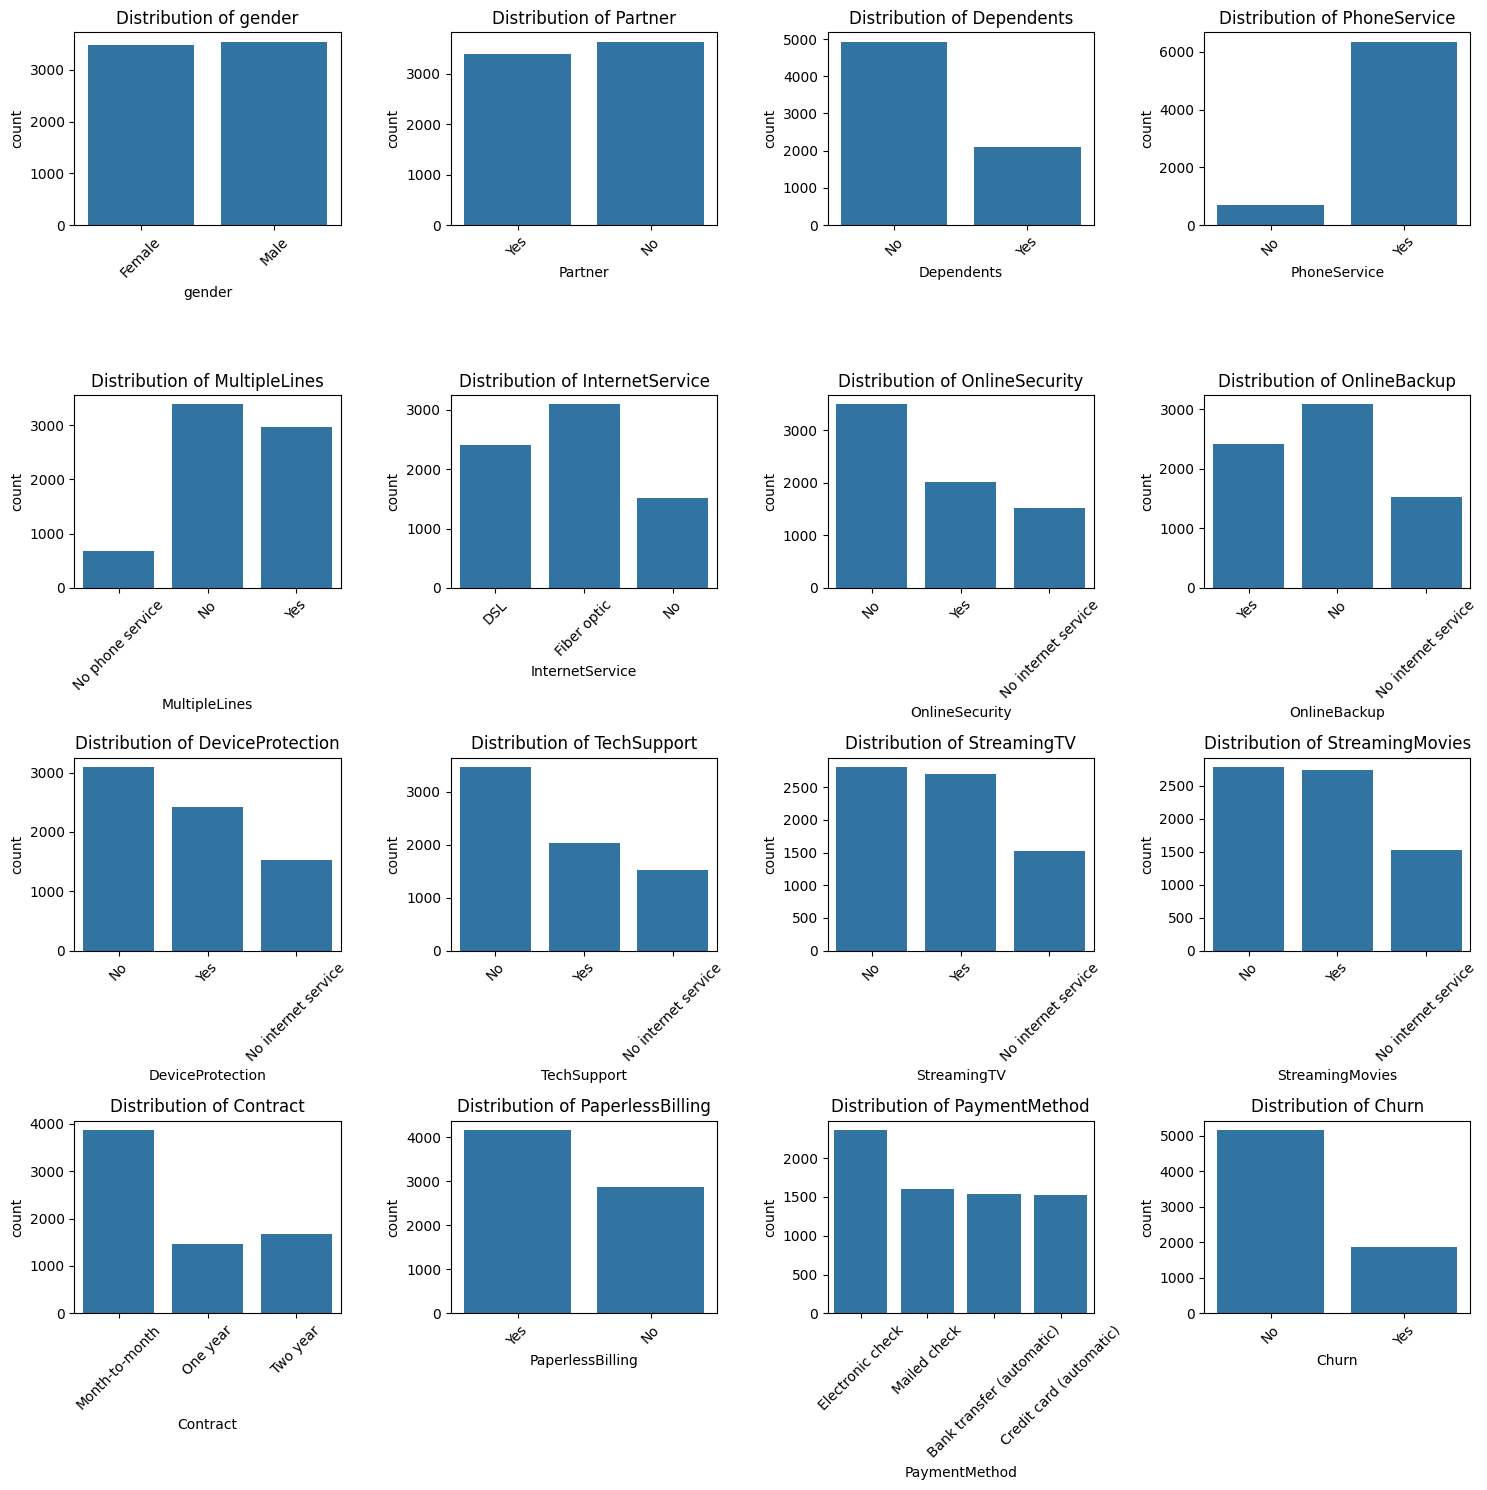

In [90]:

plt.figure(figsize=(15,15))
for i, col in enumerate(cat_cols):
    plt.subplot(4 ,4 ,i+1)
    sns.countplot(x=col, data=new_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
for col in new_df.columns:
    if new_df[col].dtype=='object':
      print(f"{col}: {new_df[col].unique()}")
    

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [92]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in binary_cols:
    new_df[col] = le.fit_transform(new_df[col])


In [93]:
service_cols= ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols:
    new_df[col] = new_df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
for col in service_cols:
    new_df[col] = le.fit_transform(new_df[col])



In [94]:
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod']
new_df = pd.get_dummies(new_df, columns=multi_class_cols, drop_first=True)


In [95]:
new_df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [96]:
corr=new_df.corr()

In [97]:
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,-0.013779,0.000048,-0.008545,-0.011189,0.004745,0.007755,-0.003603,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,0.219874,0.102411,0.150541,0.254923,-0.182519,-0.046491,-0.116205,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,0.097825,0.319072,-0.149982,0.001235,-0.000286,0.083067,0.247334,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,-0.112343,0.064653,-0.163128,-0.164101,0.138383,0.069222,0.201699,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.246862,0.825880,-0.354049,0.017930,-0.037529,0.202338,0.563801,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,0.248033,0.113008,0.011691,0.290183,0.171817,-0.003142,0.004442,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,0.490912,0.469042,0.040033,0.366420,-0.210794,-0.003594,0.106618,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.296447,0.412619,-0.171270,-0.030506,-0.332799,0.100658,0.191698,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.441529,0.510100,-0.082307,0.165940,-0.380990,0.084113,0.111391,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.482607,0.522881,-0.066193,0.176356,-0.380151,0.102911,0.165248,0.111252,-0.003308,-0.187325


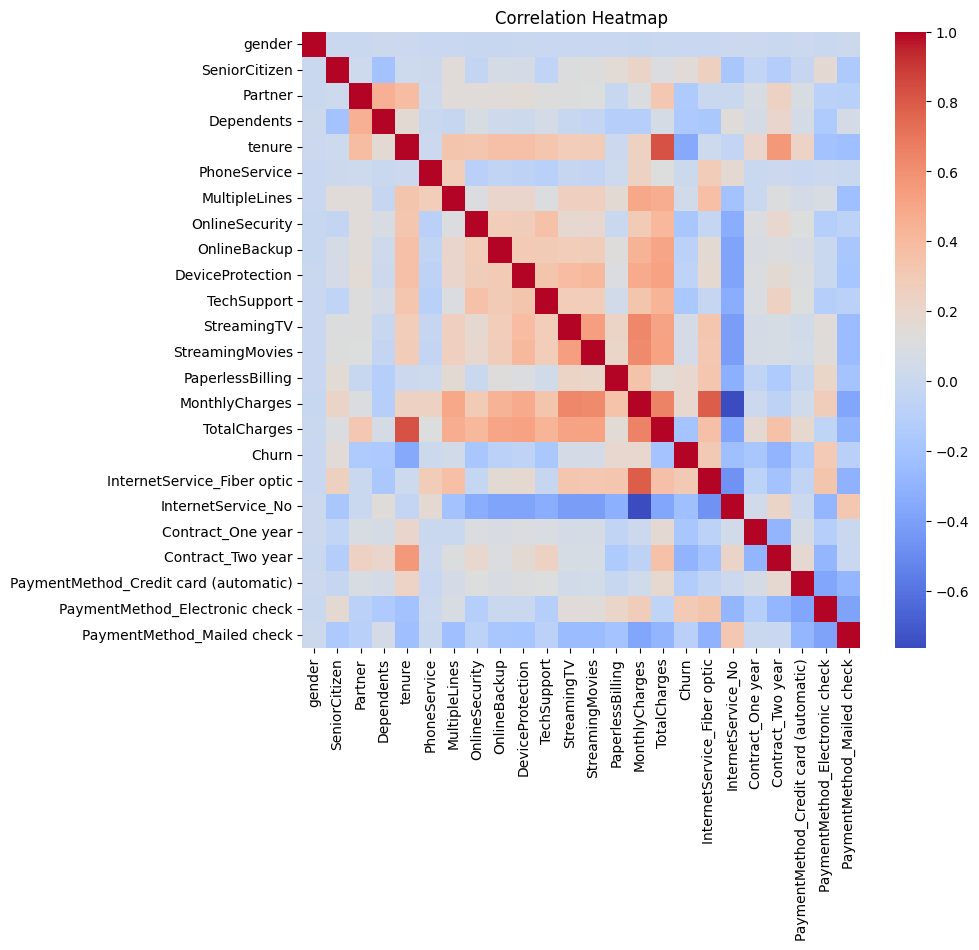

In [98]:
plt.figure(figsize=(9, 8))
sns.heatmap(new_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


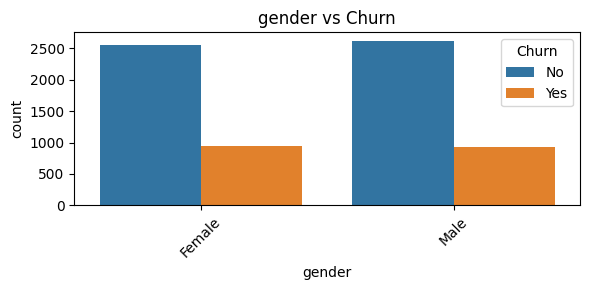

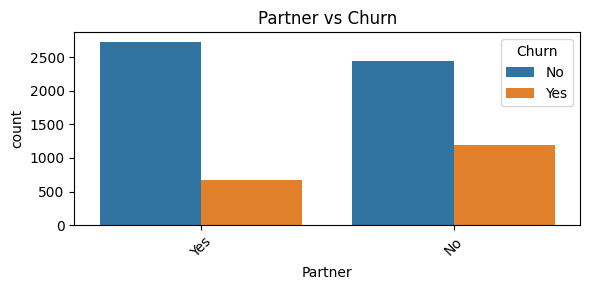

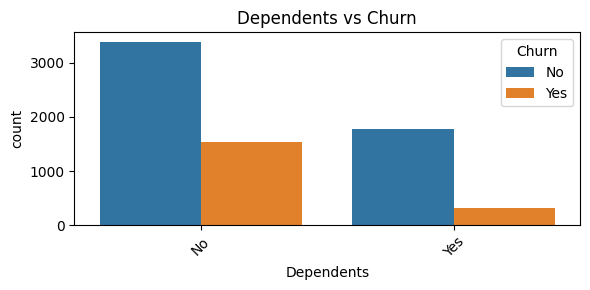

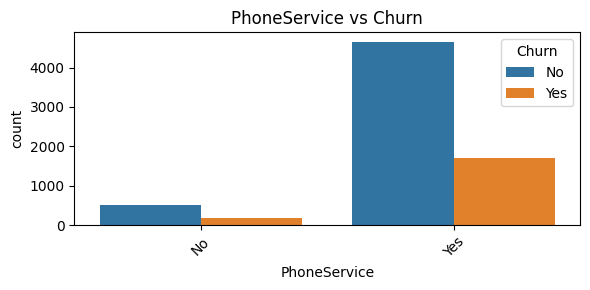

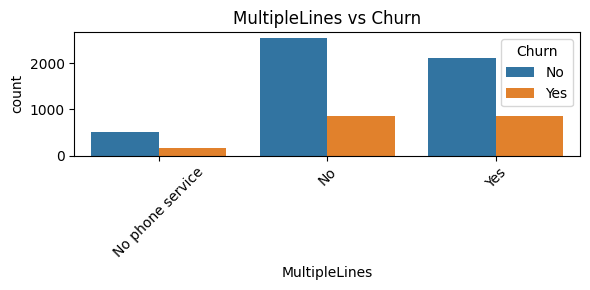

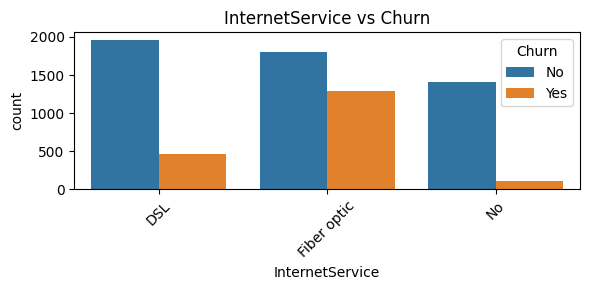

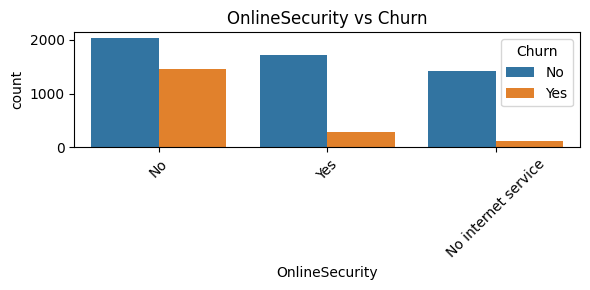

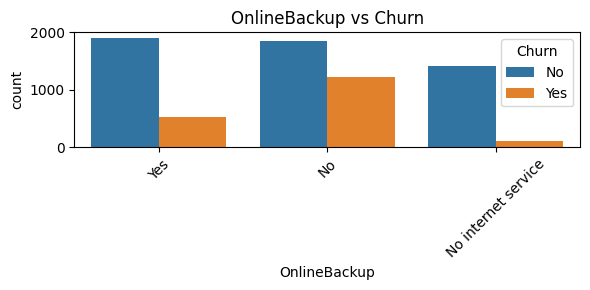

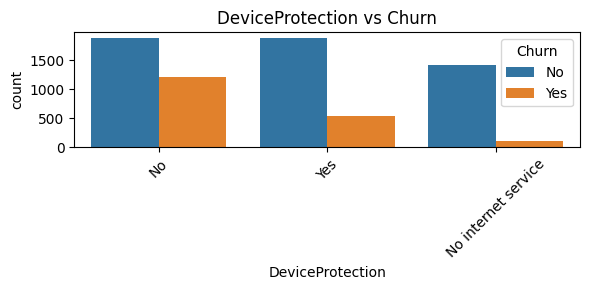

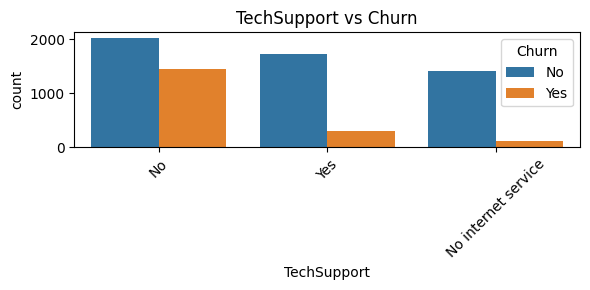

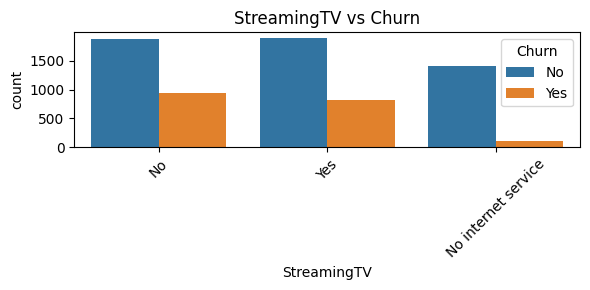

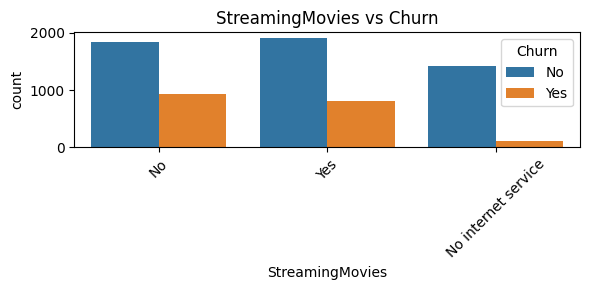

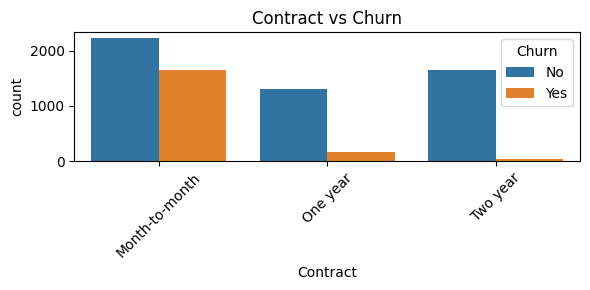

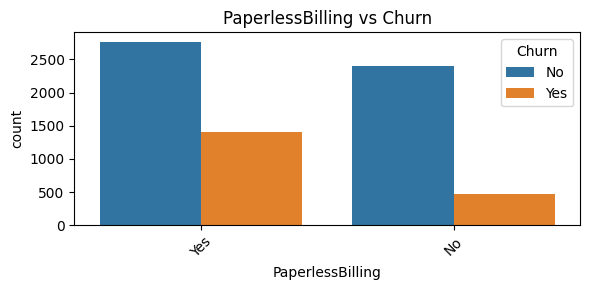

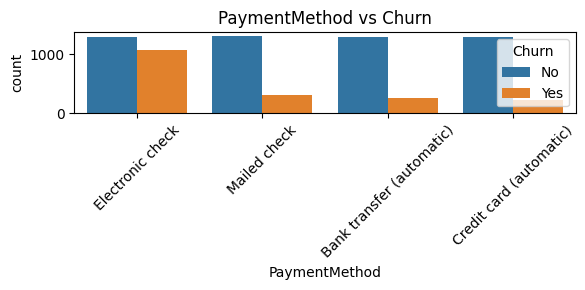

In [99]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

import seaborn as sns
import matplotlib.pyplot as plt

for  col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

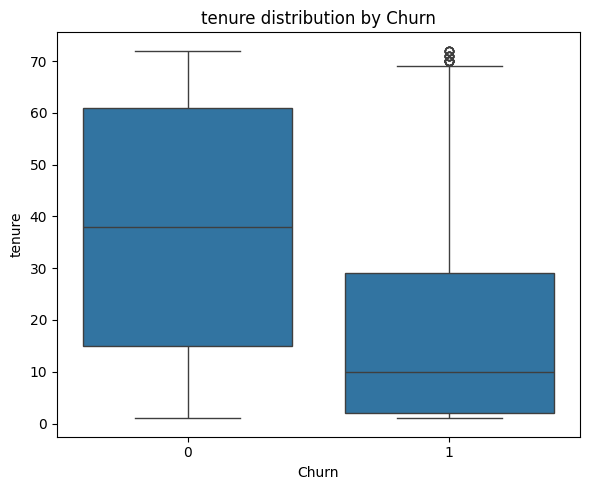

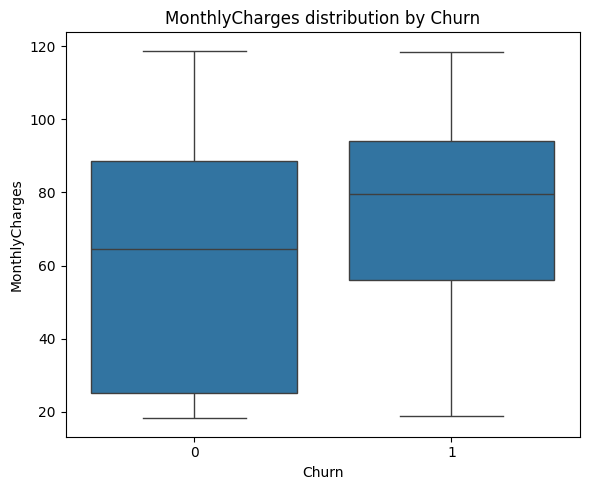

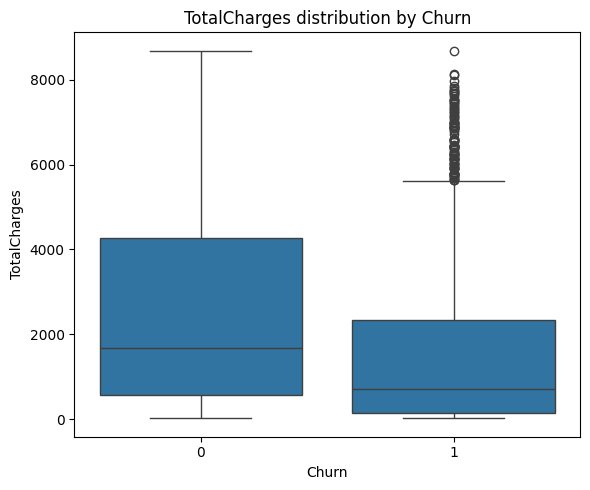

In [100]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Churn', y=col, data=new_df)
    plt.title(f'{col} distribution by Churn')
    plt.tight_layout()
    plt.show()


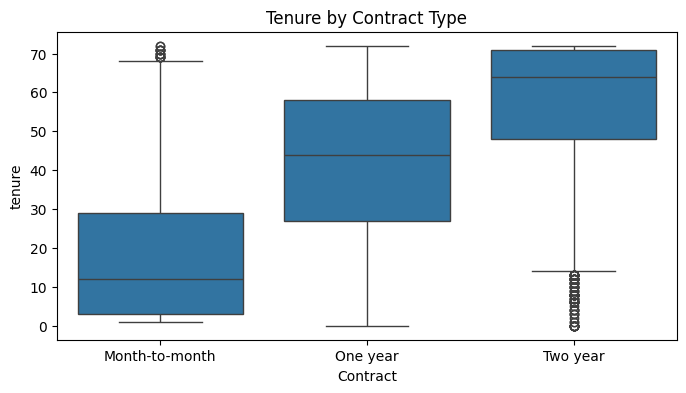

In [101]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Tenure by Contract Type')
plt.show()


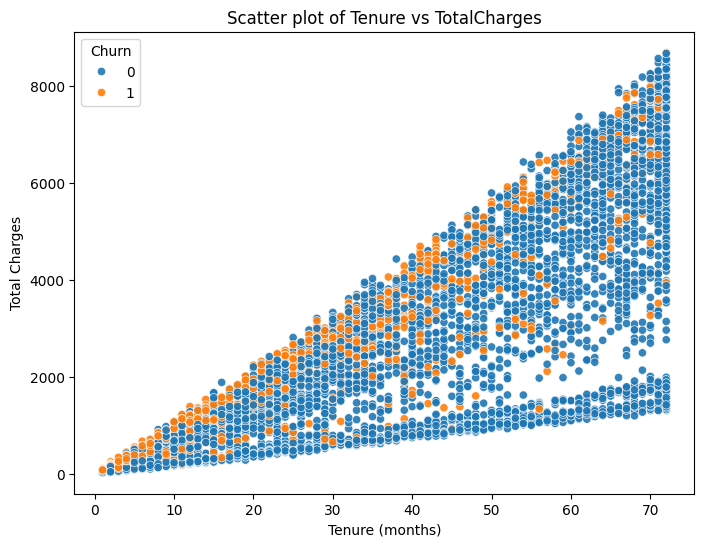

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=new_df, alpha=0.9)
plt.title('Scatter plot of Tenure vs TotalCharges')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.show()


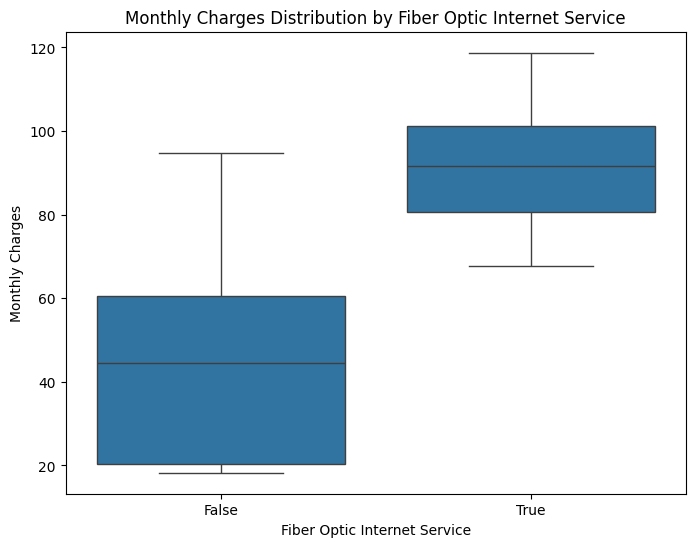

In [103]:
plt.figure(figsize=(8,6))
sns.boxplot(x='InternetService_Fiber optic', y='MonthlyCharges', data=new_df)
plt.title('Monthly Charges Distribution by Fiber Optic Internet Service')
plt.xlabel('Fiber Optic Internet Service')
plt.ylabel('Monthly Charges')
plt.show()


In [104]:
new_df.skew()

gender                                  -0.018776
SeniorCitizen                            1.831103
Partner                                  0.070024
Dependents                               0.880908
tenure                                   0.237731
PhoneService                            -2.729727
MultipleLines                            0.316232
OnlineSecurity                           0.944373
OnlineBackup                             0.652954
DeviceProtection                         0.657594
TechSupport                              0.925245
StreamingTV                              0.475441
StreamingMovies                          0.458191
PaperlessBilling                        -0.377503
MonthlyCharges                          -0.222103
TotalCharges                             0.961642
Churn                                    1.060622
InternetService_Fiber optic              0.240682
InternetService_No                       1.379453
Contract_One year                        1.429263


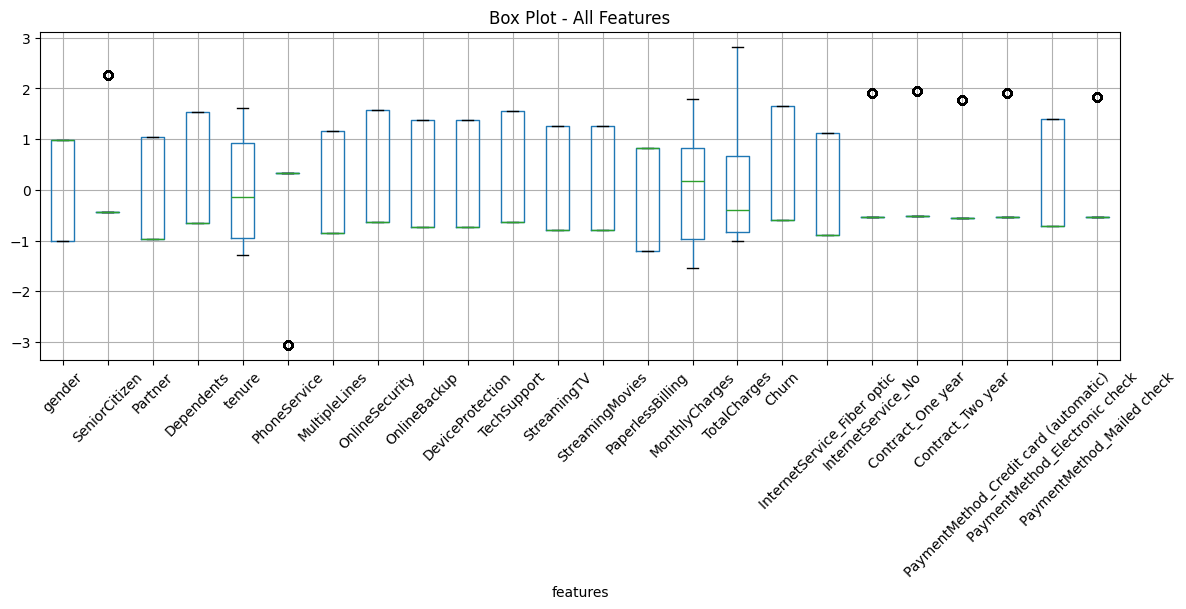

In [105]:
plt.figure(figsize=(12, 6))
df_normalized = (new_df- new_df.mean()) / new_df.std()
df_normalized.boxplot()
plt.title('Box Plot - All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("features")
plt.show()

In [106]:

num_cols = ['SeniorCitizen','PhoneService']

for col in num_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    new_df[col] = new_df[col].clip(lower=lower_bound, upper=upper_bound)

In [107]:
new_df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [108]:
new_df['TotalCharges_log'] = np.log1p(new_df['TotalCharges'])

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x = new_df.drop(columns=['Churn'])
y = new_df['Churn']

bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)


num_cols = x.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])



Logistic Regression Accuracy: 0.7996
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



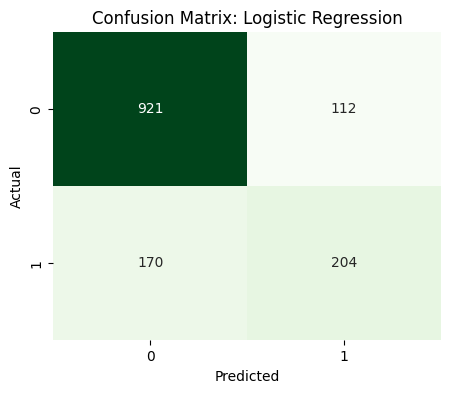


Decision Tree Accuracy: 0.7207
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.48      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



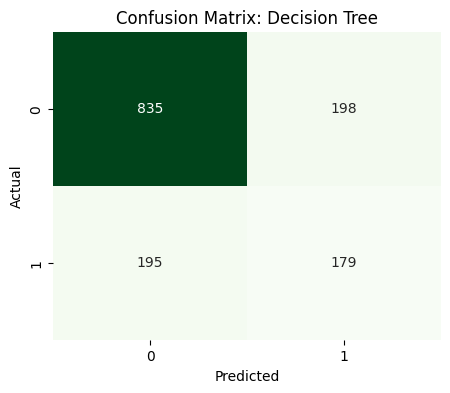


Random Forest Accuracy: 0.7790
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



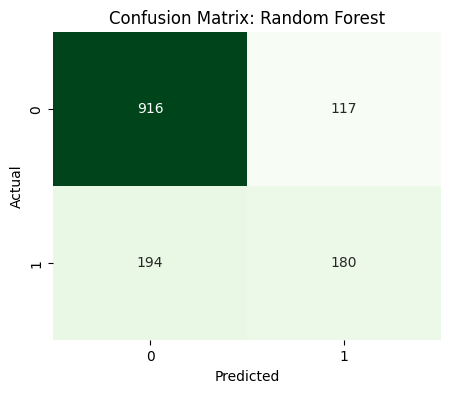


SVM Accuracy: 0.7946
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



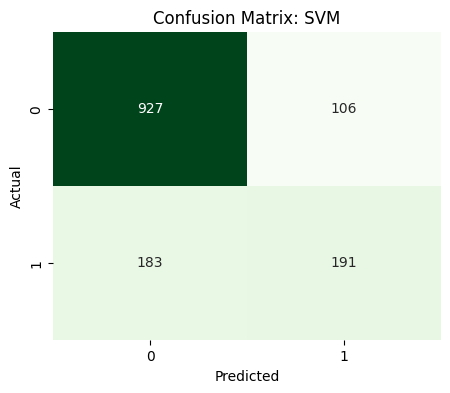


KNN Accuracy: 0.7555
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



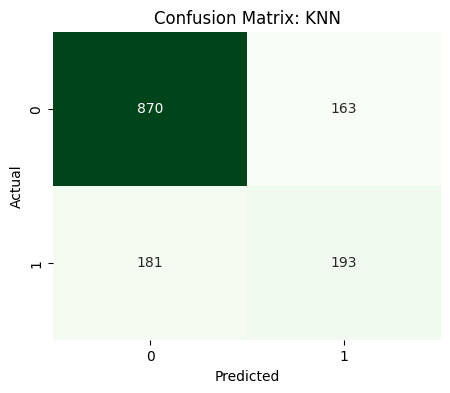

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = model.score(x_test, y_test)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Bagging with Decision Tree Accuracy: 0.7761
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



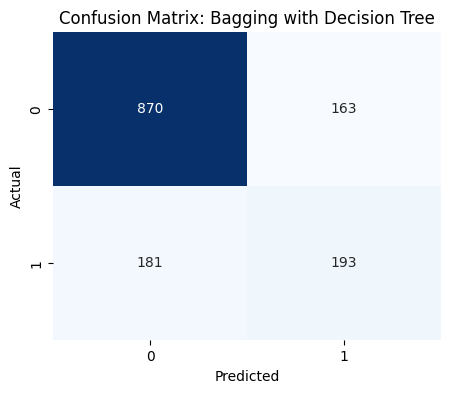

Bagging with Logistic Regression Accuracy: 0.7996
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



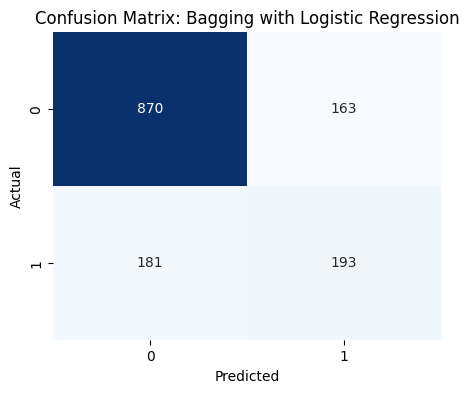

Bagging with K-Nearest Neighbors Accuracy: 0.7541
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



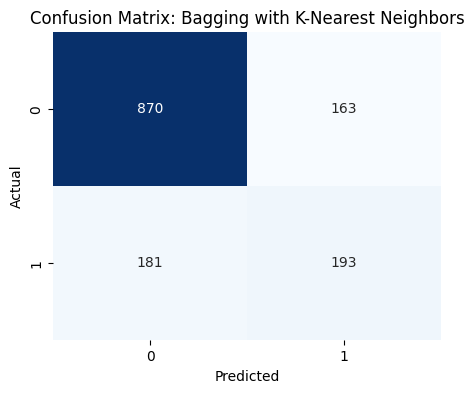

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

base_estimators = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors',KNeighborsClassifier())
]

for name, estimator in base_estimators:
    model = BaggingClassifier(estimator=estimator, n_estimators=50, random_state=42)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print(f'Bagging with {name} Accuracy: {accuracy:.4f}')
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: Bagging with {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




In [112]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

AdaBoost Accuracy: 0.7967


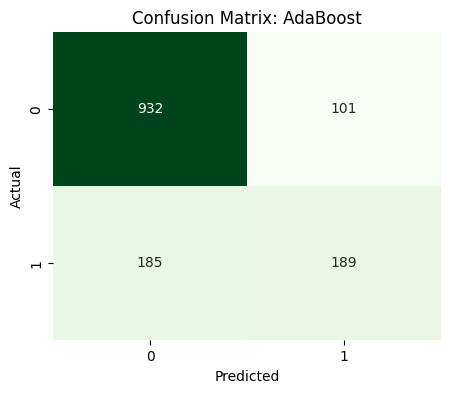

GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

GradientBoosting Accuracy: 0.7910


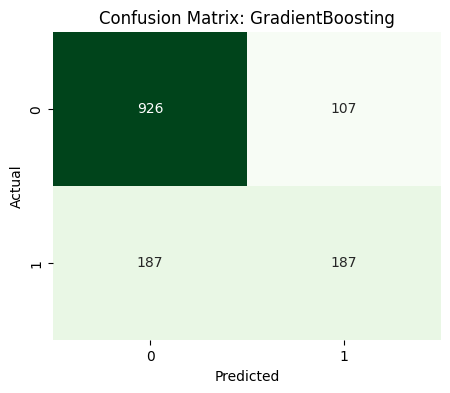

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407

XGBoost Accuracy: 0.7626


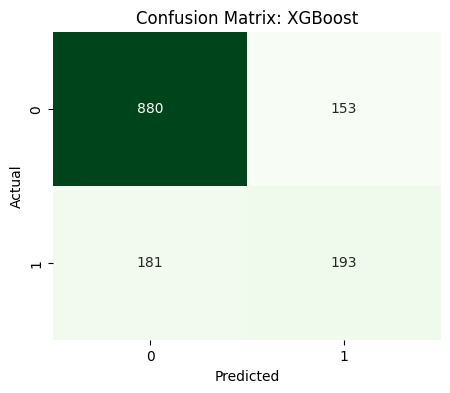

In [113]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
boosting_models = [
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('XGBoost', XGBClassifier( eval_metric='logloss', random_state=42)),
]
for name, model in boosting_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    
    print(f'{name} Accuracy: {accuracy:.4f}')
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [114]:

models = [
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Bagging(Base=Decision Tree)", BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)),
    ("Bagging(Base=Logistic Regression)", BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)),
    ("Bagging(Base=K_nearest neighbour)", BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50, random_state=42))
    ]
model_scores={}
for name, model in boosting_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    
    model_scores[name] = {
    'model': model,
    'accuracy': accuracy,
    'classification_report': classification_report(y_test, y_pred),
    'confusion_matrix': cm,
    }
best_model_name = max(model_scores, key=lambda x: model_scores[x]['accuracy'])
best_model = model_scores[best_model_name]['model']
best_accuracy = model_scores[best_model_name]['accuracy']
print("\nBest Model Automatically Selected:")
print(f"{best_model_name} with accuracy: {best_accuracy:.4f}")


Best Model Automatically Selected:
AdaBoost with accuracy: 0.7967


In [115]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Asus\OneDrive\Desktop\data science\my_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\OneDrive\Desktop\data science\my_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\OneDrive\Desktop\data science\my_project\.venv\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~

,estimator,AdaBoostClass...ndom_state=42)
,param_grid,"{'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.01, 0.1, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [116]:
best_params = grid_search.best_params_

final_model = AdaBoostClassifier(**best_params, random_state=42)
final_model.fit(x_train, y_train)


,estimator,None
,n_estimators,200
,learning_rate,1
,algorithm,'SAMME'
,random_state,42


In [117]:
final_model.score(x_train,y_train)

0.8090666666666667

In [118]:
y_pred = final_model.predict(x_test)


In [119]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [120]:
y_pred = final_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.7953
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407

Confusion Matrix:
 [[928 105]
 [183 191]]


In [121]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:,.2f}")

Mean Absolute Error: $0.20
